# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv'
df = pd.read_csv(url)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [7]:
pd.options.display.max_columns=200
pd.options.display.max_rows=40
df.sample(40)


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1404,28011,31333,4306,13.742699,4374,13.959723,4685,14.952287,3953,12.616092,3367,10.745859,3812,12.166087,3643,11.626719,2215,7.069224,978,3.121310,10680,34.085469,20069,64.050681,50,0.159576,286,0.912776,17,0.054256,231,0.737242,31333,-562,1671,13.4,12.9,0.5,0.5,-18.9,-18.3,4804,5141,5931,4961,23.1,24.7,28.5,23.8,8715,29.4,38.9,36.5,33116,30441,35791,12472,11708,764,6.1,33116,74.0,191.3,174.8,65.9,61.2,7.1,6.7,21.885144,1.122584,1.038653,12.369408,11.509110,35.471558,8,33121,6690,20.2,Bolivar,Mississippi,28,11,23722,53.4,51.3,55.3,12662,39.3,37.9,40.7,9323,9.5,8.7,10.3,2255,10.5,9.1,11.8,2483,18.6,17.4,19.8,4414,4.4,4.1,4.7,1041,5
2405,46093,28294,3431,12.126246,3724,13.161801,4482,15.840814,4011,14.176150,2998,10.595886,3492,12.341839,3429,12.119177,1810,6.397116,917,3.240970,25611,90.517424,577,2.039302,849,3.000636,322,1.138050,33,0.116633,902,3.187955,28294,312,791,9.3,7.2,2.1,0.5,8.5,9.0,992,5482,6555,4864,5.5,30.6,36.6,27.2,2309,8.4,11.5,10.2,59524,53624,65424,14107,13643,464,3.3,59524,104.4,240.4,219.1,92.8,84.8,9.2,8.6,15.169498,12.956611,1.828037,10.872008,17.350314,30.723846,3,27066,5515,20.4,Meade,South Dakota,46,93,21831,36.4,34.5,38.3,7945,28.7,27.4,30.0,6265,6.2,5.6,6.8,1348,5.4,4.6,6.2,1176,8.5,7.8,9.3,1865,2.6,2.4,2.8,567,4
2989,53077,251446,41391,16.461188,40134,15.961280,34876,13.870175,31296,12.446410,28462,11.319329,27763,11.041337,24277,9.654956,14848,5.905

In [13]:
df.describe(include="O")

,COUNTY_NAME,STATE_NAME
count,3140,3140
unique,1841,51
top,Washington,Texas
freq,31,254


In [14]:
##hacemos la lista de variable
list(df.columns)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [8]:
df[['R_birth_2018','R_death_2018','Employed_2018','Unemployed_2018']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_birth_2018     3140 non-null   float64
 1   R_death_2018     3140 non-null   float64
 2   Employed_2018    3140 non-null   int64  
 3   Unemployed_2018  3140 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 98.2 KB


In [15]:
len(list(df.columns))

108

In [17]:
#Hacemos el EDA 
#armo un correlation matrix - mapa de calor
plt.figure(figsize=(25,25))
corr_matrix = df.corr()


<Figure size 1800x1800 with 0 Axes>

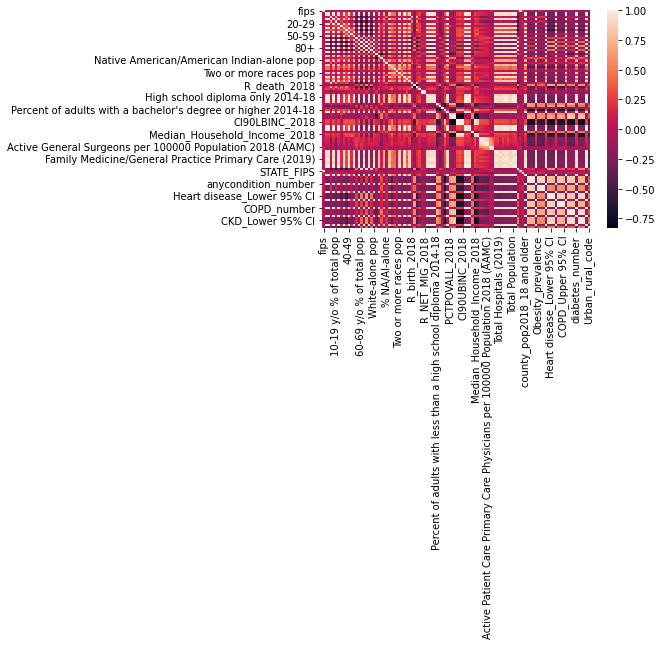

In [18]:
hit_map = sns.heatmap(corr_matrix,annot=False)
plt.show()

In [19]:
print(corr_matrix)

                            fips   TOT_POP       0-9  0-9 y/o % of total pop  \
fips                    1.000000 -0.056079 -0.049580               -0.010586   
TOT_POP                -0.056079  1.000000  0.994010                0.052507   
0-9                    -0.049580  0.994010  1.000000                0.085920   
0-9 y/o % of total pop -0.010586  0.052507  0.085920                1.000000   
19-Oct                 -0.053130  0.994596  0.997487                0.074714   
...                          ...       ...       ...                     ...   
CKD_prevalence         -0.040631 -0.218731 -0.216430               -0.133841   
CKD_Lower 95% CI       -0.044576 -0.202895 -0.200512               -0.117138   
CKD_Upper 95% CI       -0.033649 -0.230914 -0.229570               -0.153847   
CKD_number             -0.062322  0.993889  0.985337                0.040384   
Urban_rural_code       -0.008345 -0.428608 -0.423641               -0.050916   

                          19-Oct  10-19

In [38]:
X = df.drop(['Heart disease_prevalence', 'Heart disease_Lower 95% CI',
       'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI',
       'CKD_Upper 95% CI'],axis=1)
y = df['Heart disease_prevalence']

In [39]:
round(X.describe())

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
count,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0
mean,30402.0,104189.0,12740.0,12.0,13368.0,13.0,14469.0,12.0,13916.0,12.0,12885.0,12.0,13638.0,14.0,11916.0,13.0,7220.0,8.0,4036.0,5.0,79660.0,84.0,13950.0,9.0,1320.0,2.0,6156.0,2.0,255.0,0.0,2849.0,2.0,104189.0,643.0,2576.0,11.0,10.0,1.0,1.0,0.0,1.0,8582.0,18873.0,20179.0,21931.0,13.0,34.0,31.0,22.0,13328.0,15.0,21.0,20.0,52767.0,48595.0,56940.0,51476.0,49470.0,2005.0,4.0,52767.0,89.0,255.0,226.0,88.0,80.0,8.0,7.0,53.0,28.0,2.0,63.0,44.0,167.0,24.0,102227.0,21323.0,25.0,30.0,104.0,80815.0,47.0,45.0,49.0,33385.0,35.0,33.0,37.0,25276.0,5598.0,5827.0,9327.0,2466.0,5.0
std,15151.0,333583.0,41807.0,2.0,42284.0,2.0,49578.0,3.0,48991.0,2.0,43472.0,1.0,42721.0,1.0,34519.0,3.0,20287.0,2.0,12064.0,2.0,237288.0,16.0,58998.0,14.0,5362.0,8.0,43888.0,3.0,2192.0,1.0,11084.0,2.0,333583.0,3135.0,6709.0,3.0,3.0,4.0,2.0,11.0,11.0,37238.0,50829.0,60864.0,79775.0,6.0,7.0,5.0,9.0,45610.0,6.0,9.0,9.0,13908.0,13598.0,14323.0,168790.0,161957.0,6971.0,2.0,13908.0,20.0,42.0,32.0,13.0,10.0,1.0,1.0,154.0,86.0,4.0,215.

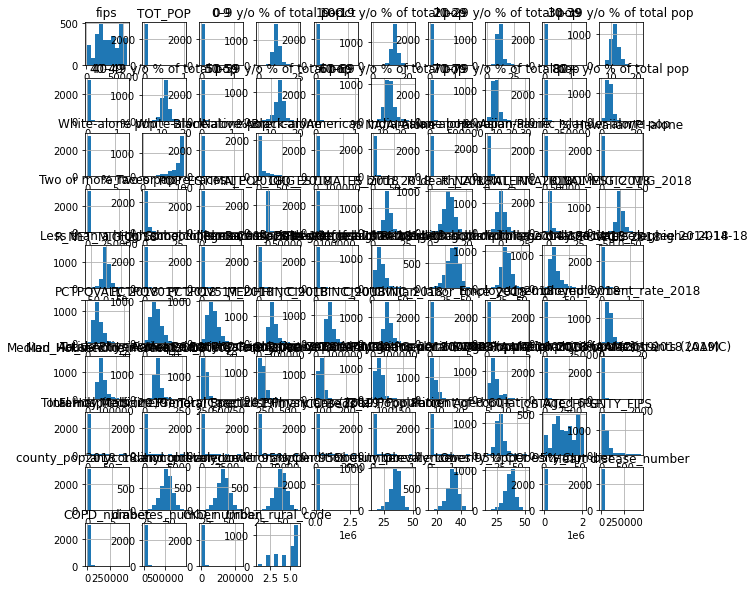

In [40]:
X.hist(figsize=(10,10), sharex=False)
plt.show()

In [41]:
X.shape #veo las vars q quedaron
#3140 observaciones en 108 columnas

(3140, 96)

In [42]:
X.describe(include='O')

,COUNTY_NAME,STATE_NAME
count,3140,3140
unique,1841,51
top,Washington,Texas
freq,31,254


In [46]:
#scamos el county name porq es mucho agregar 1841 categorias lo podria dejar para otro estudio, ahora las elimino
#X = X.drop(['COUNTY_NAME'], axis=1)
#toma vars categoricas y las pasa a dummies. los string los encodeo en 0 y 1
#X = pd.get_dummies(X,drop_first=True) 


KeyError: "['COUNTY_NAME'] not found in axis"

In [45]:
# no vamos a predecir y por tanto debemos sacar variables
# no podemos usar todas la columnas
# los datos son del 2018 y 2019
# correlacion entre columna para analizar si corresponde o no usar
X.corr()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
fips,1.000000,-0.056079,-0.049580,-0.010586,-0.053130,0.018994,-0.053591,-0.030310,-0.051715,-0.045491,-0.054239,-0.051777,-0.057730,-0.007890,-0.060851,0.036143,-0.070460,0.040678,-0.069895,0.039802,-0.052099,0.137095,-0.041127,-0.130194,-0.064405,-0.001718,-0.061055,-0.076854,-0.055792,-0.048134,-0.069552,-0.049813,-0.056079,-0.020355,-0.056912,-0.034638,-0.017157,-0.010067,0.043293,0.036635,0.045086,-0.056196,-0.052330,-0.063897,-0.052762,-0.004694,0.003130,-0.054556,0.030866,-0.053726,-0.086429,-0.094407,-0.098582,0.042657,0.039818,0.045038,-0.054097,-0.053902,-0.057558,-0.105372,0.042657,0.011284,0.075255,0.061215,0.012989,-0.014039,0.126417,0.104767,-0.059903,-0.038218,-0.030419,-0.055315,-0.047988,-0.050077,-0.052409,-0.056233,-0.065207,0.047686,0.999975,0.172777,-0.057449,0.028766,0.024075,0.033331,-0.052585,0.084044,0.079244,0.088737,-0.046061,-0.060668,-0.063463,-0.056055,-0.062322,-0.008345
TOT_POP,-0.056079,1.000000,0.994010,0.052507,0.994596,0.023384,0.994558,0.160254,0.995526,0.295635,0.998031,0.184424,0.997000,-0.092164,0.993624,-0.215300,0.980942,-0.207271,0.970889,-0.175148,0.988500,-0.153597,0.798709,0.087330,0.748573,-0.043600,0.840339,0.476078,0.478293,0.033349,0.898469,0.123643,1.000000,0.446357,0.889263,0.081277,-0.202414,0.184506,0.272763,0.001055,0.052902,0.947348,0.980574,0.991155,0.967693,-0.050199,-0.315515,-0.099708,0.329345,0.965635,-0.102499,-0.111626,-0.103165,0.277091,0.318247,0.235980,0.998042,0.997751,0.984959,-0.035662,0.277091,0.206819,0.168730,0.157866,0.112691,0.092293,0.012289,-0.051444,0.963818,0.941826,0.925033,0.941996,0.981254,0.963610,0.910824,0.999650,0.987008,-0.219115,-0.055800,-0.048796,0.99950

In [47]:
pd.options.display.max_columns=200
pd.options.display.max_rows=200
X.corr()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
fips,1.000000,-0.056079,-0.049580,-0.010586,-0.053130,0.018994,-0.053591,-0.030310,-0.051715,-0.045491,-0.054239,-0.051777,-0.057730,-0.007890,-0.060851,0.036143,-0.070460,0.040678,-0.069895,0.039802,-0.052099,0.137095,-0.041127,-0.130194,-0.064405,-0.001718,-0.061055,-0.076854,-0.055792,-0.048134,-0.069552,-0.049813,-0.056079,-0.020355,-0.056912,-0.034638,-0.017157,-0.010067,0.043293,0.036635,0.045086,-0.056196,-0.052330,-0.063897,-0.052762,-0.004694,0.003130,-0.054556,0.030866,-0.053726,-0.086429,-0.094407,-0.098582,0.042657,0.039818,0.045038,-0.054097,-0.053902,-0.057558,-0.105372,0.042657,0.011284,0.075255,0.061215,0.012989,-0.014039,0.126417,0.104767,-0.059903,-0.038218,-0.030419,-0.055315,-0.047988,-0.050077,-0.052409,-0.056233,-0.065207,0.047686,0.999975,0.172777,-0.057449,0.028766,0.024075,0.033331,-0.052585,0.084044,0.079244,0.088737,-0.046061,-0.060668,-0.063463,-0.056055,-0.062322,-0.008345
TOT_POP,-0.056079,1.000000,0.994010,0.052507,0.994596,0.023384,0.994558,0.160254,0.995526,0.295635,0.998031,0.184424,0.997000,-0.092164,0.993624,-0.215300,0.980942,-0.207271,0.970889,-0.175148,0.988500,-0.153597,0.798709,0.087330,0.748573,-0.043600,0.840339,0.476078,0.478293,0.033349,0.898469,0.123643,1.000000,0.446357,0.889263,0.081277,-0.202414,0.184506,0.272763,0.001055,0.052902,0.947348,0.980574,0.991155,0.967693,-0.050199,-0.315515,-0.099708,0.329345,0.965635,-0.102499,-0.111626,-0.103165,0.277091,0.318247,0.235980,0.998042,0.997751,0.984959,-0.035662,0.277091,0.206819,0.168730,0.157866,0.112691,0.092293,0.012289,-0.051444,0.963818,0.941826,0.925033,0.941996,0.981254,0.963610,0.910824,0.999650,0.987008,-0.219115,-0.055800,-0.048796,0.99950

In [49]:
# vamos a sacar el data set de pruebas y dejar en data set de aprendizaje

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=57, test_size=0.15)  

In [50]:
# escalamos usando minmaxscaler

scaler = MinMaxScaler()
print(scaler.fit(X_train))
print(scaler.data_max_)
print(scaler.transform(X_train))


ValueError: could not convert string to float: 'Michigan'

In [51]:
#corremos las regresion Laso, para ver q var nos quedan, esto saca las otras var q no son redundantes para el modelo
modelo = Lasso(alpha = 0.3,normalize = True)
modelo.fit(X_train,y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


ValueError: could not convert string to float: 'Michigan'

In [52]:
#hacemos la prediccion y vemos el tipo de error

predicciones = modelo.predict(X_test)

ValueError: could not convert string to float: 'Texas'

In [ ]:
rmse_lasso = mean_squared_error(y_true = y_test,
                                y_pred = predicciones,
                                squared = False
                               )
print(f"RMSE de test es: {rmse_lasso}")

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error

modelo2 = LassoCV(
                    alphas = np.logspace(-10, 3, 200),
                    normalize = True,
                    cv = 10
                 )
_ = modelo2.fit(X = X_train, y = y_train)

In [ ]:

#vemos las var q quedaron y como quedaron los coeficientes.
#las vars socio demograficas estan imapactando en enfermedades del corazon
